<a href="https://colab.research.google.com/github/Sham2112/Atlas-Autoencoder/blob/master/poki_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
poki = pd.read_csv('./poki.csv')

In [93]:
len(poki)

61508

In [94]:
poki.head()

,id,title,author,grade,text,char
0,104987,I Love The Zoo,NaN,1,"roses are red, violets are blue. i love the...",62
1,67185,The scary forest.,NaN,1,the forest is really haunted. i believe it to...,87
2,103555,A Hike At School,1st grade-wh,1,i took a hike at school today and this is wha...,324
3,112483,Computer,a,1,you can do what you want you can play a...,106
4,74516,Angel,aab,1,angel oh angle you spin like a top angel oh an...,164


In [97]:
# Number of poems in each grade and average len of poems by grade
grade_count_avlen = {}
counts = []
av_lengths = []

for i in range(1,13):
    p = poki[poki['grade'] == i]
    count = len(p)
    av_len = p['char'].mean()
    counts.append(count)
    av_lengths.append(av_len)
    
    grade_count_avlen[i] = (count, av_len)


print(grade_count_avlen)

{1: (904, 189.78097345132744), 2: (3187, 165.94257922811423), 3: (6734, 179.56103356103355), 4: (10939, 201.4369686443002), 5: (11510, 227.7154648132059), 6: (11038, 254.61125203841274), 7: (7842, 306.36355521550627), 8: (4553, 343.7909070942236), 9: (1292, 475.73219814241486), 10: (1176, 476.51445578231295), 11: (667, 532.1124437781109), 12: (1666, 505.3097238895558)}


<BarContainer object of 12 artists>

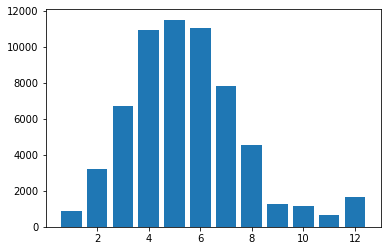

In [98]:
#Plotting grade vs no. of characters
grades = list(grade_count_avlen.keys())

plt.bar(grades, counts)

<BarContainer object of 12 artists>

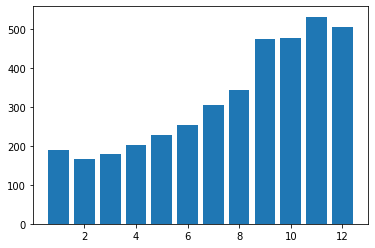

In [99]:
#plotting grade vs avg. poem length
plt.bar(grades, av_lengths)

In [0]:
#tokenizing and removing punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
poki['tokenized_text'] = poki['text'].apply(tokenizer.tokenize)

In [105]:
poki['tokenized_text'].iloc[0]

['roses',
 'are',
 'red',
 'violets',
 'are',
 'blue',
 'i',
 'love',
 'the',
 'zoo',
 'do',
 'you']

In [0]:
#calculating the pos tag count vs grade
grade_pos_count = {}

for i in range(1,13):
    p = poki[poki['grade'] == i]   
    pos_tag_count = {}
    p1 = p['tokenized_text']

    for index, tokens in p1.items():
        for w, p in nltk.pos_tag(tokens):
            if p in pos_tag_count.keys():
                pos_tag_count[p] += 1
            else:
                pos_tag_count[p] = 1
    
    grade_pos_count[i] = pos_tag_count

<BarContainer object of 33 artists>

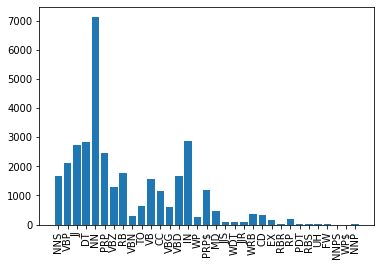

In [110]:
#plotting the pos tags for grades 1 and 12
plt.xticks(rotation='vertical')
plt.bar(grade_pos_count[1].keys(), grade_pos_count[1].values())

<BarContainer object of 34 artists>

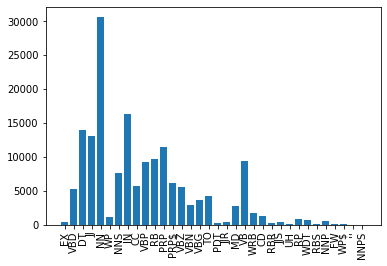

In [111]:
plt.xticks(rotation='vertical')
plt.bar(grade_pos_count[12].keys(), grade_pos_count[12].values())

In [0]:
#Now lets analyze the poki-analysis dataset
#the authors of the dataset explain their methods in this paper - (https://arxiv.org/pdf/2004.06188.pdf)
pa = pd.read_csv('poki-analysis.csv')

In [127]:
pa.head()

,id,grade,author,val_sd,aro_sd,dom_sd,anger_sd,fear_sd,sadness_sd,joy_sd,valence,arousal,dominance,anger,fear,sadness,joy,total_words,gender
0,13985,4,melissa,0.232184,0.121740,0.288507,NaN,NaN,NaN,NaN,0.596833,0.362667,0.442000,NaN,NaN,0.844,NaN,6,Female
1,13987,5,nadia,0.293415,0.193891,0.194279,NaN,NaN,NaN,NaN,0.604000,0.410400,0.473800,NaN,NaN,NaN,0.788000,5,Female
2,13989,3,brandon,0.328506,0.255830,0.172985,NaN,0.131522,NaN,0.231863,0.487000,0.501000,0.507875,NaN,0.869,0.797,0.306667,8,Male
3,13990,5,jannat,0.208608,0.186677,0.169186,NaN,NaN,NaN,0.375474,0.587600,0.349400,0.410100,NaN,NaN,NaN,0.515500,10,Female
4,13992,5,blake,0.207633,0.181070,0.145530,NaN,NaN,NaN,0.178011,0.723800,0.530800,0.604100,NaN,NaN,0.016,0.456000,10,Ambiguous


In [149]:
#What is the average value of emotions based by grade
for i in range(1,13):
    p = pa[pa['grade'] == i]
    print("Grade: {} Avg-  valence: {} dominance: {} arousal: {} anger: {} fear: {} sadness: {} joy: {}".format(i, p['valence'].mean(), p['dominance'].mean(), p['arousal'].mean(), p['anger'].mean(), p['fear'].mean(), p['sadness'].mean(), p['joy'].mean() ))

Grade: 1 Avg-  valence: 0.6428100122499371 dominance: 0.4741460874967719 arousal: 0.4293801109407898 anger: 0.38710355149236736 fear: 0.4104694451185709 sadness: 0.3815041119303367 joy: 0.45789455267146756
Grade: 2 Avg-  valence: 0.6454022598310369 dominance: 0.47791349439581887 arousal: 0.4404008096857872 anger: 0.4117131836522121 fear: 0.44776858421976246 sadness: 0.37061885893461227 joy: 0.47319686599709143
Grade: 3 Avg-  valence: 0.6403088145093544 dominance: 0.4793301276024067 arousal: 0.4446098202022696 anger: 0.43401660612988396 fear: 0.4492104950884353 sadness: 0.37869770687541987 joy: 0.47996252594414873
Grade: 4 Avg-  valence: 0.631336435945938 dominance: 0.47819406308666335 arousal: 0.4436896742766678 anger: 0.4370781458836087 fear: 0.4622497064493364 sadness: 0.3926023200544331 joy: 0.47518463175101633
Grade: 5 Avg-  valence: 0.6276024437609699 dominance: 0.482412499149096 arousal: 0.4484972118265145 anger: 0.4409443894005411 fear: 0.4555928744118296 sadness: 0.404656509768

In [0]:
#Lets calculate the mean valence and std vs grade for each gender gender (ignoring Ambigious and NA genders for now)
fem_val_mu = {}
men_val_mu = {}
fem_val_sd = {}
men_val_sd = {}

for i in range(1, 13):
    p = pa[pa['grade'] == i]
    f = p[p['gender'] == 'Female']
    m = p[p['gender'] == 'Male']

    fem_val_mu[i] = f['valence'].mean()
    fem_val_sd[i] = f['val_sd'].mean()
    men_val_mu[i] = m['valence'].mean()
    men_val_sd[i] = m['val_sd'].mean()

In [142]:
men_val_sd[1]

0.18270840668246294

<ErrorbarContainer object of 3 artists>

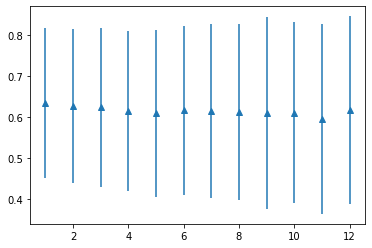

In [146]:
#Lets plot the mean and std of each grade
plt.errorbar(men_val_mu.keys(), men_val_mu.values(), yerr=men_val_sd.values(), linestyle='None', marker='^')

<ErrorbarContainer object of 3 artists>

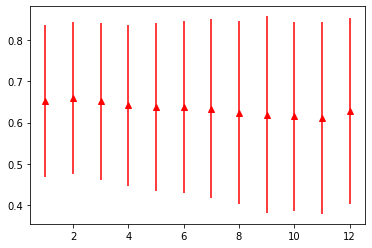

In [147]:
plt.errorbar(fem_val_mu.keys(), fem_val_mu.values(), yerr=fem_val_sd.values(), linestyle='None', marker='^', color='red')